In [61]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import trigrams
import json
import re
import unidecode
import nltk
import string
from nltk import FreqDist

In [62]:
#Agregar stopwords
stopw=stopwords.words('spanish')
#Extender la lista de stopwords
palabras=["felipe", "calderon","hinojosa", "gobierno", "presidente"]
stopw.extend(palabras)
stopw

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [63]:
#Json con referencias de Felipe Calderón
calderon= json.load(open('calderon.json'))
calderon

{'results': [{'_id': '64d557e904fc07ae636e0ec5',
   'upload_date': '2023-08-10',
   'title': 'gobierno compra marca mexicana de aviación y crea aerolínea del estado. conferencia presidente amlo',
   'segments': [{'id': 147,
     'start': 2161.36,
     'end': 2168.36,
     'text': ' Los gobiernos de Calderón y Peña Nieto en todo momento sistemáticamente nos negaron,',
     'temperature': 0,
     'avg_logprob': -0.11035524451214335,
     'compression_ratio': 1.5320754716981133,
     'no_speech_prob': 6.957543064345373e-06},
    {'id': 570,
     'start': 5124.24,
     'end': 5137.28,
     'text': ' los dueños había estado de director del Cisen con Calderón, Guillermo Valdés.',
     'temperature': 0,
     'avg_logprob': -0.18916112899780274,
     'compression_ratio': 1.2536231884057971,
     'no_speech_prob': 5.484511689246574e-08},
    {'id': 572,
     'start': 5146.2,
     'end': 5161.679999999999,
     'text': ' mismo con la misma empresa de Valdés en favor de Calderón en la elección de

In [88]:
#Conferencias con mención a Calderón
len(calderon["results"])

704

In [64]:
texts = []
for i in range(704):  
    for j in range(len(calderon["results"][i]["segments"])):
        texts.append(calderon["results"][i]["segments"][j]["text"])
print("Se han obtenido", len(texts), "textos.")
texts

Se han obtenido 2277 textos.


[' Los gobiernos de Calderón y Peña Nieto en todo momento sistemáticamente nos negaron,',
 ' los dueños había estado de director del Cisen con Calderón, Guillermo Valdés.',
 ' mismo con la misma empresa de Valdés en favor de Calderón en la elección del 2006. Lo',
 ' acabo de descubrir en mis papeles, hizo lo mismo, o sea, infló a Calderón.',
 ' Imagínense inflar en aquel entonces a Calderón que después con el fraude lo imponen y una',
 ' la vida miles de mexicanos y llega Calderón impuesto con el apoyo de la oligarquía y',
 ' Calderón, pues es producto de lo mismo, de cómo en un proceso electoral',
 ' de México, nace en el fraude del 2006 y a quienes ayudan a Calderón en el fraude del',
 ' 2006, el Consejo Colonial Empresarial de entonces les da Calderón a Aeroméxico y nos quedamos',
 ' que fue secretario de Gobernación de Felipe Calderón y también abogado de las grandes',
 ' Fox, lo mismo, traslado de bienes de la nación, todos, hablábamos de Mexicana, Calderón,',
 ' contra el narco d

In [65]:
trigram_lists = []
for text in texts:
    # Tokenization
    words = nltk.word_tokenize(text.lower())
    #Eliminar acentos
    words = [unidecode.unidecode(word) for word in words]
    #Eliminar signos de puntuacion
    words = [word for word in words if word not in string.punctuation]
    
    # Eliminar stopwords
    filtered_words = [word for word in words if word not in stopw]
    #Sustituir sedillo por zedillo
    filtered_words = [word.replace('sedillo','zedillo') for word in filtered_words]

    # Lista de trigramas
    trigram_lists.extend(list(nltk.trigrams(filtered_words)))

In [66]:
frecuencia = FreqDist(bigram_lists)
#Frecuencia como dataframe
frecuencia = pd.DataFrame(frecuencia.most_common(), columns=['trigrama', 'frecuencia'])
#Obtener probabilidad de bigramas
frecuencia['probabilidad'] = frecuencia['frecuencia']/sum(frecuencia['frecuencia'])
#Dejar probabilidad y bigrama
frecuencia = frecuencia[['trigrama', 'probabilidad']]
#Ordenar por probabilidad
frecuencia = frecuencia.sort_values(by='probabilidad', ascending=False)
#Dejar los 30 primeros
frecuencia = frecuencia.head(40)
frecuencia

,trigrama,probabilidad
0,"(enrique, pena, nieto)",0.003923
1,"(secretario, seguridad, publica)",0.003064
2,"(fox, pena, nieto)",0.002574
3,"(zedillo, fox, pena)",0.002206
4,"(salinas, zedillo, fox)",0.002084
5,"(genaro, garcia, luna)",0.001103
6,"(luna, secretario, seguridad)",0.000858
7,"(garcia, luna, secretario)",0.000735
8,"(fox, enrique, pena)",0.000735
12,"(21, millones, hectareas)",0.000613


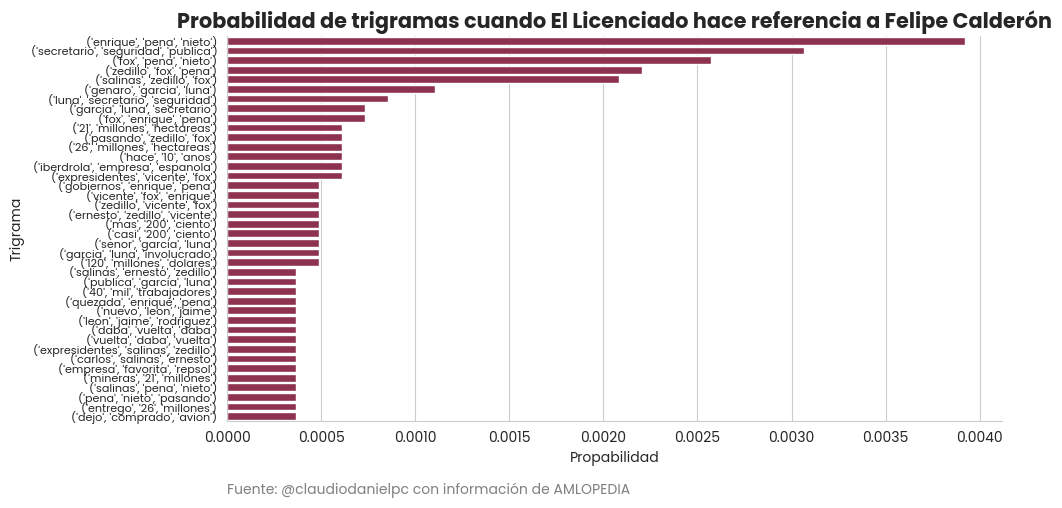

In [87]:
#graficar probabilidad de bigramas

fuente="Poppins"
sns.set_style("whitegrid")
plt.figure(figsize=(10,5))
plt.title('Probabilidad de trigramas cuando El Licenciado hace referencia a Felipe Calderón', fontweight='bold', fontsize=15,fontname=fuente)
sns.barplot(x='probabilidad', y='trigrama', data=frecuencia, color='#9d2449')
plt.xlabel('Propabilidad', fontname=fuente)
plt.ylabel('Trigrama', fontname=fuente)
plt.xticks(fontname=fuente)
plt.yticks(fontname=fuente,size=8)
#Eliminar los bordes de la gráfica
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#Añadir fuente de datos
plt.text(0, -0.2, 'Fuente: @claudiodanielpc con información de AMLOPEDIA', fontsize=10, color='gray', ha='left', va='bottom', transform=plt.gca().transAxes, fontname=fuente)

#Guardar imagen
plt.savefig('trigramas.png', dpi=300, bbox_inches='tight')

plt.show()

In [76]:
import matplotlib.font_manager
fonts = set([f.name for f in matplotlib.font_manager.fontManager.ttflist])
print("Poppins" in fonts)


True
